In [1]:
#install.packages("transformr")
library(readxl)
library(tidyverse)
library(transformr)
library(gganimate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
us.data <- read.csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
us.data$date <- as.Date(us.data$date)
us.data <- us.data %>%
            arrange(date) %>%
           # mutate(cases = cases + seq.int(nrow(us.data))*0.0000001) %>%
            group_by(state) %>%
            mutate(newcases = cases - lag(cases, 1)) %>%
            mutate(smacases = (newcases + lag(newcases, 1) + lag(newcases, 2))/3 ) 
#us.data %>% filter(state=='Kansas')

In [3]:
p <- ggplot(us.data, aes(x=cases)) +
    geom_line(aes(y=smacases, colour=state)) +
#    geom_line(aes(y=deaths, colour=state)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::label_comma(accuracy=1)) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases (3 day SMA)", 
         title="COVID-19 Confirmed New Cases against Cumulative Cases",
         subtitle="US state breakdown",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 04/04/20, data: The New York Times (https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)") + 
    scale_colour_discrete(name="")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 165 row(s) containing missing values (geom_path).”


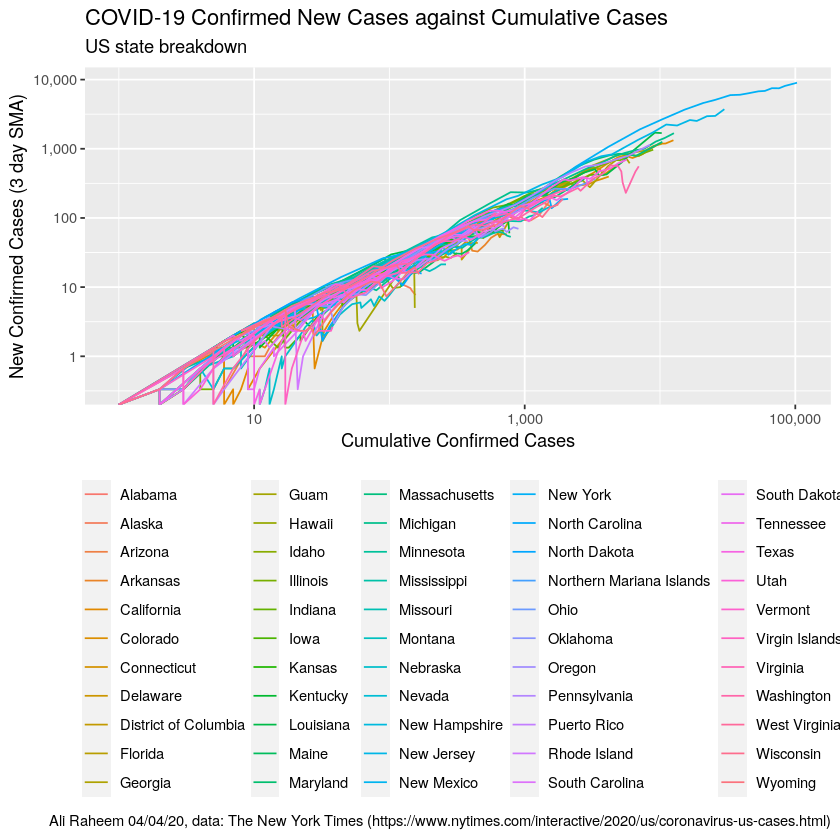

In [4]:
p

In [5]:
ggsave('COVID-19_loglog_US.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 165 row(s) containing missing values (geom_path).”


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 165 row(s) containing missing values (geom_path).”


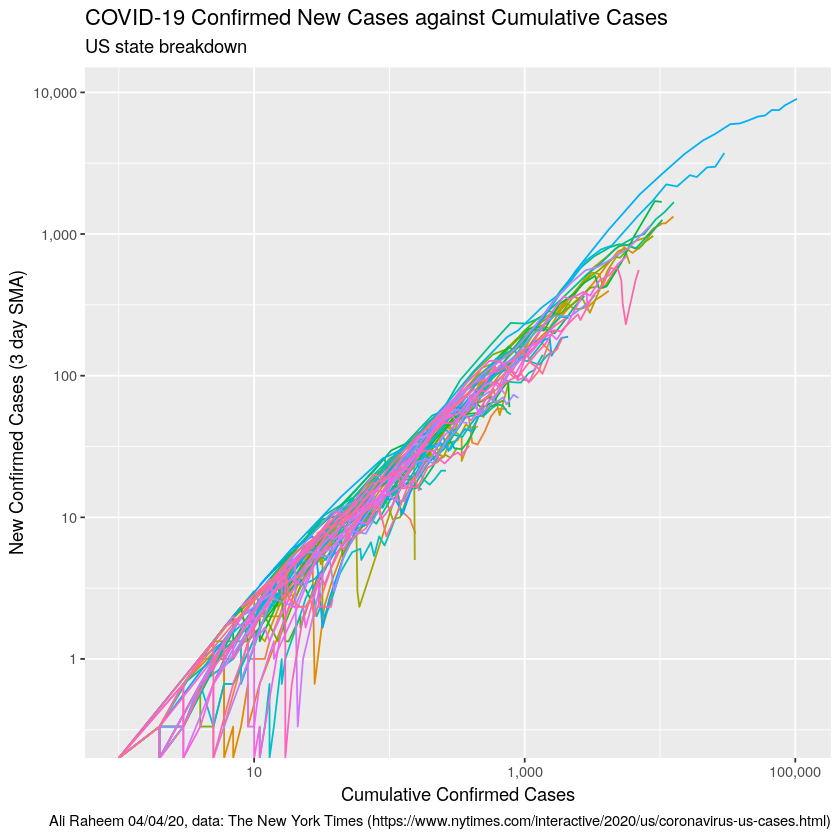

In [6]:
p <- p + theme(legend.position = "none")
p

In [7]:
ggsave('COVID-19_loglog_US_nolegend.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 165 row(s) containing missing values (geom_path).”


In [8]:
p + transition_time(date) + labs(subtitle="Cumulative Cases: {frame_time}")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

Rendering [>-------------------------------------------] at 8.8 fps ~ eta: 11s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

Rendering [=>------------------------------------------] at 8.6 fps ~ eta: 11s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=>------------------------------------------] at 8.7 fps ~ eta: 11s
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observatio

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [===================>------------------------] at 8.4 fps ~ eta:  6s
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [====================>-----------------------] at 8.4 fps ~ eta:  6s
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=====================>----------------------] at 8.4 fps ~ eta:  6s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message:
“Removed 5 row(s) 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=====================================>------] at 8.4 fps ~ eta:  2s
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [======================================>-----] at 8.4 fps ~ eta:  1s
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [=======================================>----] at 8.4 fps ~ eta:  1s
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the gro